# Binary classification Kaggle Jan 2024

## Exploratory Data Analysis

### Import libraries used

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt  

### Loading Data

In [2]:
test = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")


In [3]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
train.nunique()

id                 165034
CustomerId          23221
Surname              2797
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
Exited                  2
dtype: int64

### Selecting Appropritate Features

In [6]:
train = train[["CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Exited"]]


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [8]:
train.nunique()

CreditScore          457
Geography              3
Gender                 2
Age                   71
Tenure                11
Balance            30075
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55298
Exited                 2
dtype: int64

### Convert features to their appropriate type

In [9]:
train["Age"].max()

92.0

In [10]:
train["Balance"].max()

250898.09

In [11]:
train["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
train["Age"] = train["Age"].astype(np.int8)
train["Tenure"] = train["Tenure"].astype(np.int8)
train["Balance"] = train["Balance"].astype(np.int32)
train["NumOfProducts"] = train["NumOfProducts"].astype(np.int8)
train["HasCrCard"] = train["HasCrCard"].astype(bool)
train["IsActiveMember"] = train["IsActiveMember"].astype(bool)
train["Exited"] = train["Exited"].astype(bool)
train["EstimatedSalary"] = train["EstimatedSalary"].astype(np.int64)
train['Gender'] = train['Gender'].map({'Male': bool(0), 'Female': bool(1), 0:bool(0), 1:bool(1)})
# train["Geography"] = train["Geography"].astype(np.int2)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   CreditScore      165034 non-null  int64 
 1   Geography        165034 non-null  object
 2   Gender           165034 non-null  bool  
 3   Age              165034 non-null  int8  
 4   Tenure           165034 non-null  int8  
 5   Balance          165034 non-null  int32 
 6   NumOfProducts    165034 non-null  int8  
 7   HasCrCard        165034 non-null  bool  
 8   IsActiveMember   165034 non-null  bool  
 9   EstimatedSalary  165034 non-null  int64 
 10  Exited           165034 non-null  bool  
dtypes: bool(4), int32(1), int64(2), int8(3), object(1)
memory usage: 5.5+ MB


### Save the data frame we have done so far

In [38]:
train.to_csv("data/preprocessed_trained_data.csv", index = False)

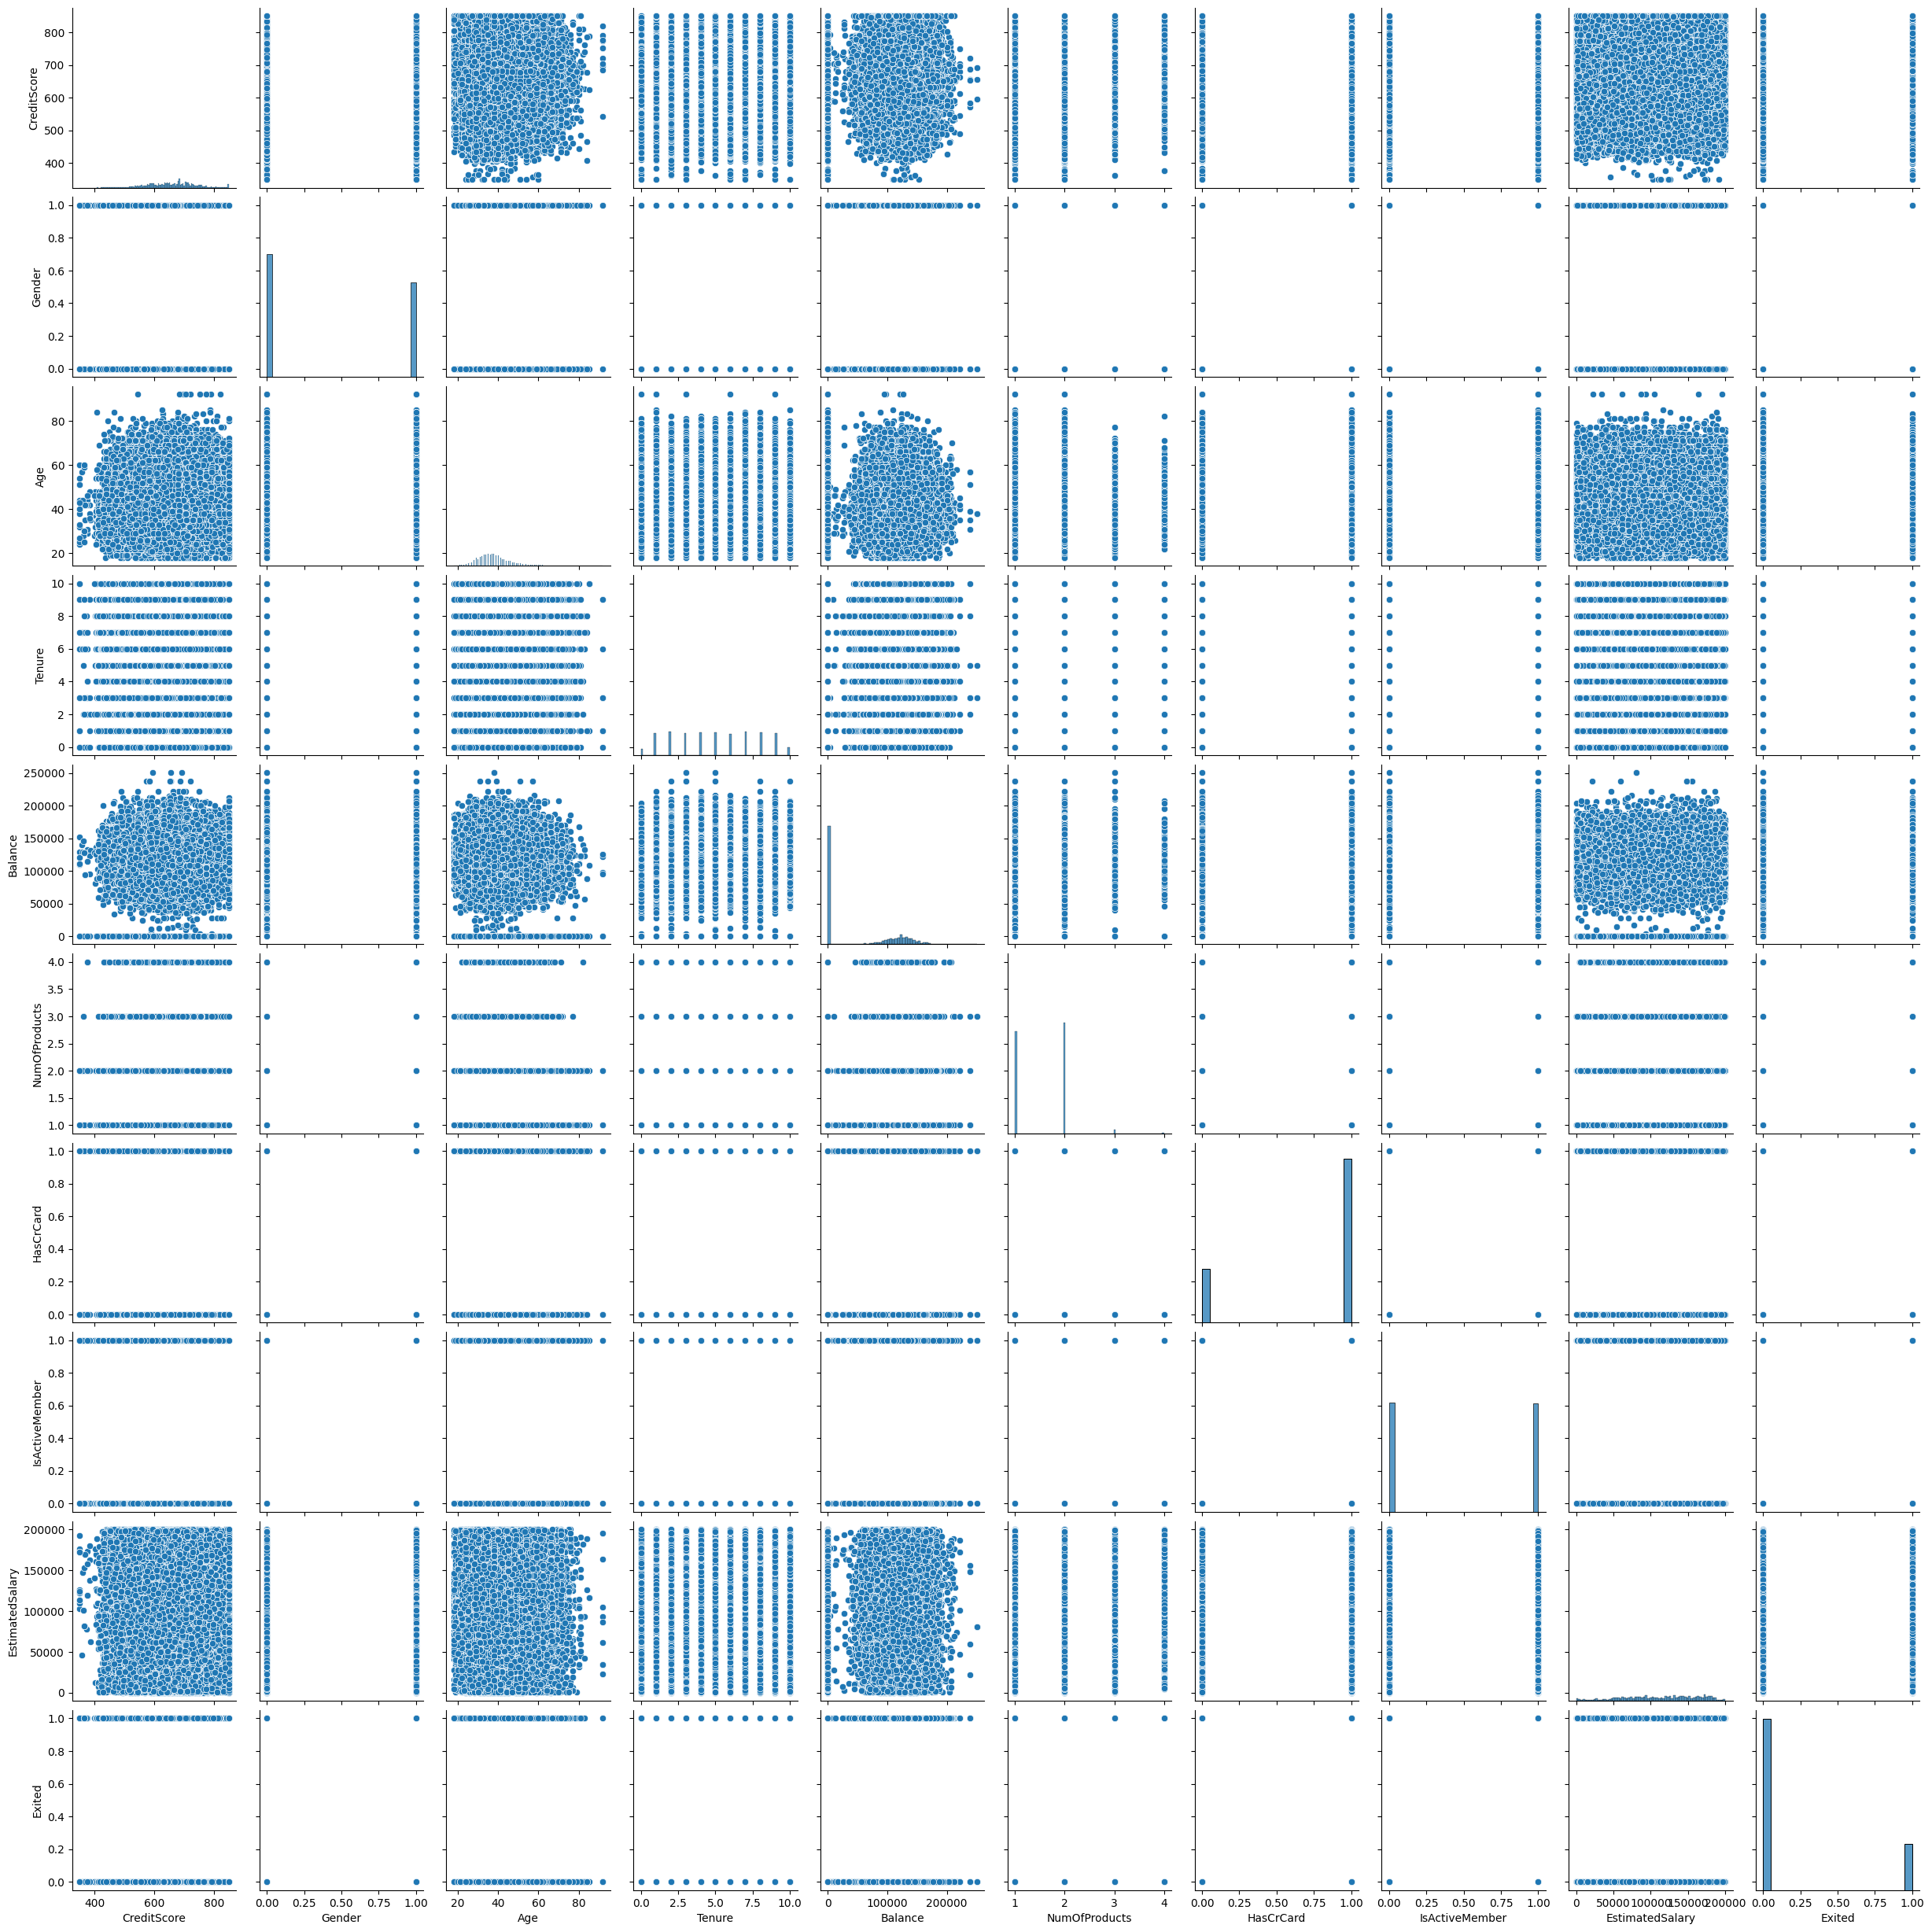

In [13]:
train["EstimatedSalary"].unique()
sns.pairplot(train)
plt.show()

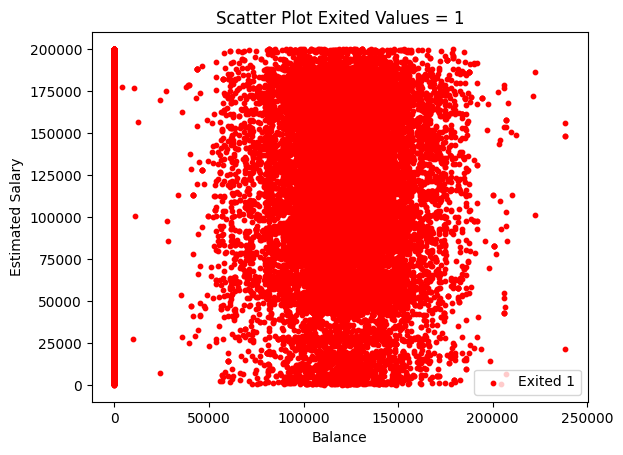

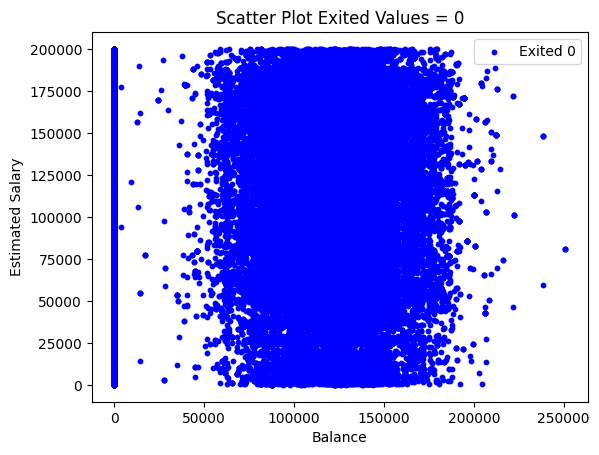

In [14]:
# Separate data based on 'exit' value
exited_0 = train[train['Exited'] == 0]
exited_1 = train[train['Exited'] == 1]

# Create a scatter plot with different colors for each 'exit' value
plt.scatter(exited_1['Balance'], exited_1['EstimatedSalary'], c='red', label='Exited 1', s=10)
# Add labels and legend
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
plt.legend()
plt.title('Scatter Plot Exited Values = 1')
plt.show()
plt.scatter(exited_0['Balance'], exited_0['EstimatedSalary'], c='blue', label='Exited 0', s=10)
# Add labels and legend
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
plt.legend()
plt.title('Scatter Plot Exited Values = 0')
plt.show()

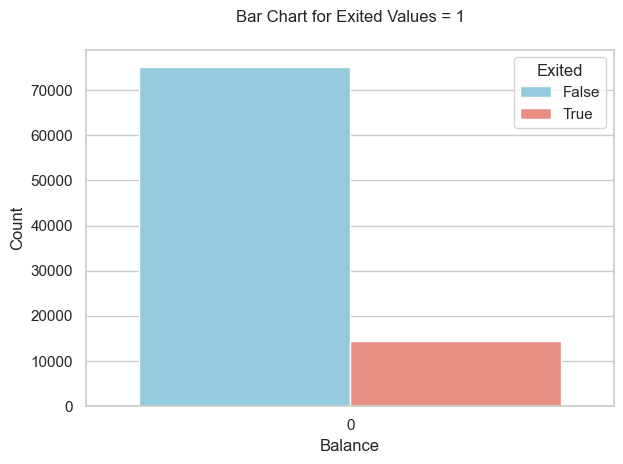

In [35]:
# Set the style for the plot
sns.set(style='whitegrid', palette='pastel')

# Create a countplot with a hue for 'Exited'
sns.countplot(x='Balance', hue='Exited', data=pd.concat([exited_0[exited_0['Balance'] == 0], exited_1[exited_1['Balance'] == 0]]), palette=['skyblue', 'salmon'])

# Add labels and legend
plt.xlabel('Balance')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right')

# Title with a bit more space
plt.title('Bar Chart for Exited Values = 1', pad=20)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
print(train["Tenure"].nunique())

11


In [ ]:
train["Tenure"].unique()

array([ 3,  1, 10,  2,  5,  4,  8,  6,  9,  7,  0], dtype=int8)

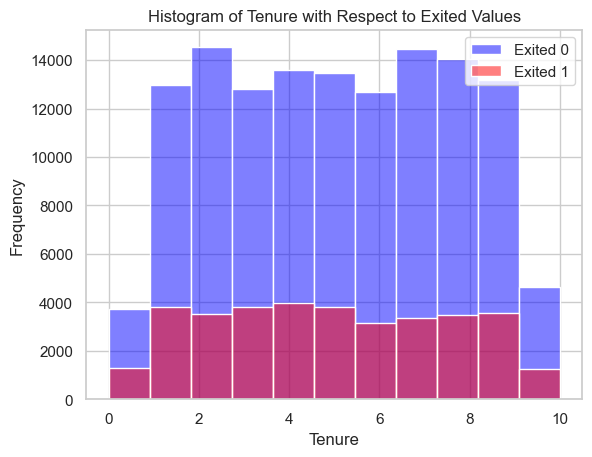

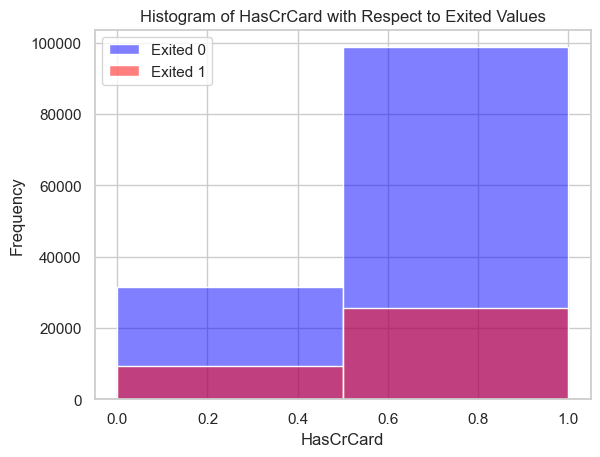

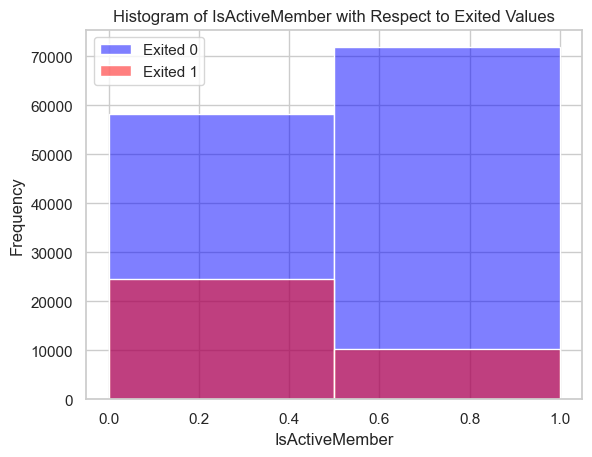

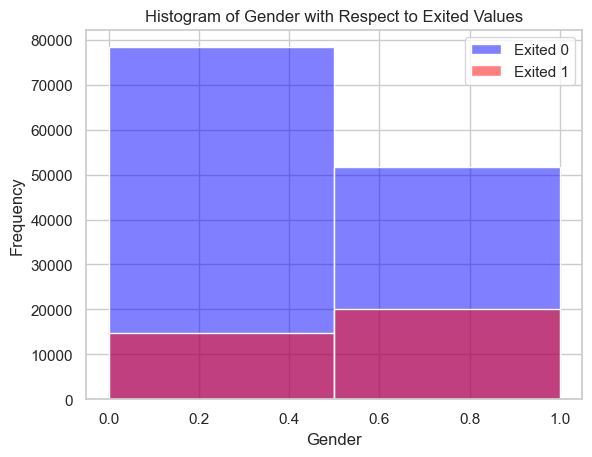

In [ ]:
for i in ["Tenure","HasCrCard","IsActiveMember","Gender"]:
    # Set the style for the plot (optional)
    sns.set(style="whitegrid")

    # Create histograms for each 'exit' value using Seaborn
    sns.histplot(exited_0[i], bins=train[i].nunique(), alpha=0.5, label='Exited 0', color='blue')
    sns.histplot(exited_1[i], bins=train[i].nunique(), alpha=0.5, label='Exited 1', color='red')

    # Add labels and legend
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Histogram of '+ i + ' with Respect to Exited Values')

    # Show the plot
    plt.show()

## Feature Engineering

In [ ]:
### 